# Normality Testing, T-testing and ANOVA

## Part 1: Import Database

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_nparray = iris.data

iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe["group"] = pd.Series([iris.target_names[k] for k in iris.target], dtype = "category")

## Part 2: Kurtosis and Skewness test

To find out whether our data are normally distributed or not, we apply **Skewness** and **Kurtosis** testing.

If they are not normally distributed, then statistical testing is innacurate.

(Of course there is a huge gap between parametric and non-parametric tests but will not focus on that now).

Python has the following two libraries for conducting skewness and kurtosis testing:

In [4]:
from scipy.stats import skew, skewtest
from scipy.stats import kurtosis, kurtosistest

**Skewness** measures the asymmetry of the probability distribution of ONE random variable on its mean. It tells you the amount and direction of skew (right or left).

- If skewness is less than -1 or greater than 1, then the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, sad distributions is approximately symetric.
- If skewness figure is negative the curve is skewed to the left
- If skewness figure is positive the curve is skewed to the right

**Kurtosis** tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

**Z-score** is the standardized value of (x-mean(Σx))/std(Σx). In simple words, it is how far a particular result is from the mean in terms of standard deviation.

**P-Value**: In the following test, we determine whether the P-Value is less than or equal to 0.05. If so, we will have to reject normality, which implies that we could obtain better results if we try to transform the variable into a normal one.

### 2.1 - Skewness

In [5]:
k = skew(iris_dataframe["petal length (cm)"])
zscore,pvalue = skewtest(iris_dataframe["petal length (cm)"])
print  ("Skewness: %0.3f\nZ-score:  %0.3f\nP-value:   %0.3f" % (k, zscore, pvalue))

Skewness: -0.272
Z-score:  -1.400
P-value:   0.162


**Skewness Test Results**: The test shows that the data is slightly skewed to the left but not enough to make it unusable.

### 2.2 - Kurtosis

In [6]:
k = kurtosis(iris_dataframe["petal length (cm)"])
zscore,pvalue = kurtosistest(iris_dataframe["petal length (cm)"])
print  ("Kurtosis %0.3f\nZ-score: %0.3f\nP-value:  %0.3f" % (k, zscore, pvalue))

Kurtosis -1.396
Z-score: -14.823
P-value:  0.000


**Kurtosis Test Results**: The test shows that the curve is much too flat to be bell shapes. What can be done here is to bring data into a different form and an approach will be examined in another experiment.

## Part 3: Boxplots

Boxplots are allowing us to identify outliers and observe discrepancies between our features. The following code presents two type of boxplots:
1. As per variables' distribution (which will be plotted using matplotlib)
2. As per groups' distribution (which will be plotted using seaborn)

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
boxplots = iris_dataframe.boxplot(return_type="axes")
plt.title("Boxplots for Variables",color="black",fontsize=40)

Text(0.5, 1.0, 'Boxplots for Variables')

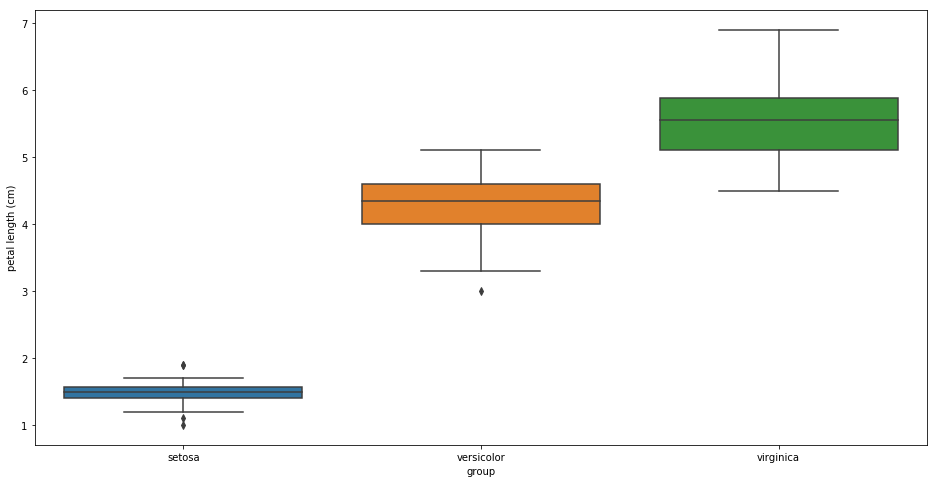

In [8]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(x="group", y="petal length (cm)", data=iris_dataframe)

- The conclusion that we can draw from the above diagram is that regarding the length feature, the versicolor and virginica group have some overlapping instances.

## Part 4: T-testing and ANOVA

Having spotted some possible differences between groups, related to a variable, we can apply some T-testing or ANOVA to identify the significance of the difference between the group's means.

For this case, we will check the Petal Length as we have already identified via the boxplots some differences between the groups.

- **T-testing**: T-test compares **ONLY two features (two groups)** at a time, to see if there is significant difference between their **means**.

- **ANOVA**: Is checking more than two features simutaneously

### 4.1 - T-testing

In [16]:
group0 = iris_dataframe["group"] == "setosa"
group1 = iris_dataframe["group"] == "versicolor"
group2 = iris_dataframe["group"] == "virginica"

print ("Variance of Petal Length of Versicolor: %0.3f\nVariance of Petal Length of Virginica:  %0.3f" % (iris_dataframe["petal length (cm)"][group1].var(),iris_dataframe["petal length (cm)"][group2].var()))

from scipy.stats import ttest_ind
print ()
t, pvalue = ttest_ind(iris_dataframe["sepal width (cm)"][group1], iris_dataframe["sepal width (cm)"][group2],axis=0, equal_var=False)
print ("T statistic: %0.3f\nP-value:      %0.3f" % (t,pvalue))

Variance of Petal Length of Versicolor: 0.221
Variance of Petal Length of Virginica:  0.305

T statistic: -3.206
P-value:      0.002


- When the p value is below 0.05, we can confirm that the group's means are significantly different

### 4.2 - ANOVA

In [12]:
from scipy.stats import f_oneway

f,pvalue = f_oneway (iris_dataframe["sepal width (cm)"][group0],iris_dataframe["sepal width (cm)"][group1],iris_dataframe["sepal width (cm)"][group2])

print ("One-way ANOVA\nF-value: %0.3f\nP-value: %0.3f" % (f,pvalue))

One-way ANOVA
F-value: 49.160
P-value: 0.000


- **F test**: The above value provides us a point where we can use it to reject data. The F test is following the null hypothesis once we identify the critical value.

## Part 5: Standardization / Creating a Z score

As we saw above, there are different scales and the data are heterogenous.

As such, we will need to **transform data** in a way that makes them easily comparable.

In the following example we will standardize data, which means that we will use the equation: [x-mean(Σx)] / std(Σx) for all features of the iris dataset.

In [13]:
from sklearn.preprocessing import scale

stand_sepal_length = scale(iris_dataframe["sepal length (cm)"])
stand_sepal_width = scale(iris_dataframe["sepal width (cm)"])
stand_petal_length = scale(iris_dataframe["petal length (cm)"])
stand_petal_width = scale(iris_dataframe["petal width (cm)"])

In [14]:
df1 = pd.DataFrame({'Sepal Length':stand_sepal_length,'Sepal Width':stand_sepal_width,'Petal Width':stand_petal_width,'Petal Length':stand_petal_length, "Category": iris_dataframe["group"]})
df1.head()

,Sepal Length,Sepal Width,Petal Width,Petal Length,Category
0,-0.900681,1.019004,-1.315444,-1.340227,setosa
1,-1.143017,-0.131979,-1.315444,-1.340227,setosa
2,-1.385353,0.328414,-1.315444,-1.397064,setosa
3,-1.506521,0.098217,-1.315444,-1.283389,setosa
4,-1.021849,1.249201,-1.315444,-1.340227,setosa


## Part 6: Boxplots after Standardization

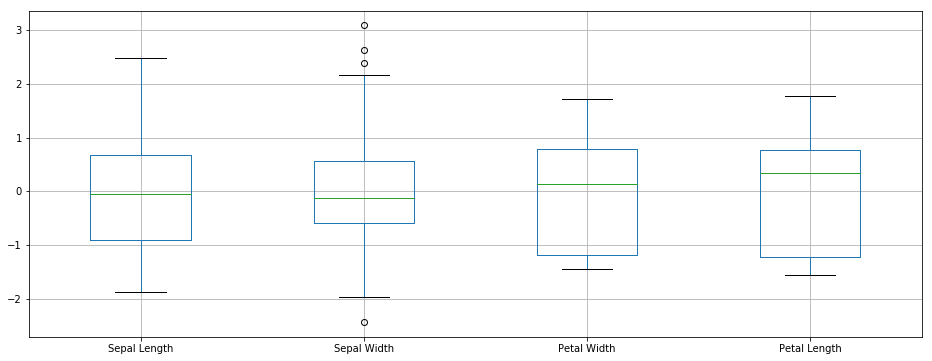

In [15]:
plt.figure(figsize=(16,6))
boxplots = df1.boxplot(return_type="axes")

## Part 7: Conclusions:

By standardizing the data and by viewing the last boxplot chart, it is easier to compare and to reach into conclusions.

- One thing here is that means are approximately similar but not the same. This is because data were standardized.

- Another thing is that it is easier to detect and remove outliers.